In [1]:
import numpy as np
import pandas as pd

In [2]:
df = pd.read_csv('spam.csv', encoding='latin1')

In [3]:
df.sample(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
2332,ham,We are both fine. Thanks,NaN,NaN,NaN
1029,ham,"Its good, we'll find a way",NaN,NaN,NaN
4134,ham,No need to say anything to me. I know i am an ...,NaN,NaN,NaN
4127,ham,I dont thnk its a wrong calling between us,NaN,NaN,NaN
3600,ham,"Jay told me already, will do",NaN,NaN,NaN


In [4]:
df.shape

(5572, 5)

In [5]:
# data cleaning
#EDA
#text preprocessing
#model building
#evaluation
#improvement
#website
#deploy

## Data cleaning

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


In [7]:
#drop last 3 columns
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [8]:
df.sample(5)

,v1,v2
114,ham,"Wa, ur openin sentence very formal... Anyway, ..."
703,ham,"Thats a bit weird, even ?- where is the do sup..."
2586,ham,If you don't respond imma assume you're still ...
2139,ham,But i juz remembered i gotta bathe my dog today..
558,ham,Hi Princess! Thank you for the pics. You are v...


In [9]:
#renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

,target,text
5254,ham,I didnt get anything da
4546,ham,Hey mate. Spoke to the mag people. WeÛ÷re on....
4947,spam,"Hi this is Amy, we will be sending you a free ..."
2945,ham,make that 3! 4 fucks sake?! x
358,ham,"I'm an actor. When i work, i work in the eveni..."


In [10]:
 #apply label encoder
from sklearn.preprocessing import LabelEncoder
encoder=LabelEncoder()

In [11]:
df['target']=encoder.fit_transform(df['target'])

In [12]:
df.head()

,target,text
0,0,"Go until jurong point, crazy.. Available only ..."
1,0,Ok lar... Joking wif u oni...
2,1,Free entry in 2 a wkly comp to win FA Cup fina...
3,0,U dun say so early hor... U c already then say...
4,0,"Nah I don't think he goes to usf, he lives aro..."


In [13]:
#missing values
df.isnull().sum()

target    0
text      0
dtype: int64

In [14]:
#check for duplicates

In [15]:
df.duplicated().sum()

403

In [16]:
#remove duplicates

In [17]:
df=df.drop_duplicates(keep='first')

In [18]:
df.duplicated().sum()

0

In [19]:
df.shape

(5169, 2)

## EDA

In [20]:
df['target'].value_counts()

target
0    4516
1     653
Name: count, dtype: int64

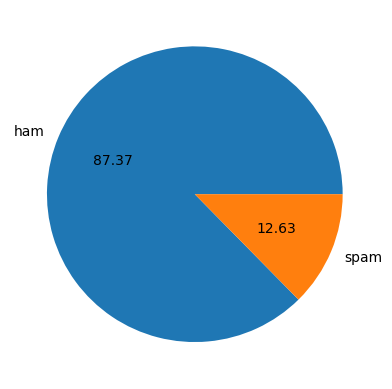

In [21]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(),labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [22]:
df = df.copy()  # ensure you're working with a true copy
df['num_characters'] = df['text'].apply(len)


In [23]:
df.head()

,target,text,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [24]:
df['word_tokens'] = df['text'].apply(lambda x: x.split())
df['num_words'] = df['word_tokens'].apply(len)

In [25]:
df.head()

,target,text,num_characters,word_tokens,num_words
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...",20
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, u, oni...]",6
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",28
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor..., U, c, already...",11
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, don't, think, he, goes, to, usf,, he,...",13


In [26]:
import re

def count_sentences(text):
    sentences = re.split(r'(?<=[.!?]) +', text)
    return len([s for s in sentences if s.strip()])  # ignore empty strings

df['num_sentences'] = df['text'].apply(count_sentences)


In [27]:
df.head()

,target,text,num_characters,word_tokens,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...",20,3
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, u, oni...]",6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",28,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor..., U, c, already...",11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, don't, think, he, goes, to, usf,, he,...",13,1


In [28]:
df.head()

,target,text,num_characters,word_tokens,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...",20,3
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, u, oni...]",6,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",28,2
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor..., U, c, already...",11,2
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, don't, think, he, goes, to, usf,, he,...",13,1


In [29]:
df[['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,5169.000000,5169.000000,5169.000000
mean,78.977945,15.340685,2.076030
std,58.236293,11.068488,1.511765
min,2.000000,1.000000,1.000000
25%,36.000000,7.000000,1.000000
50%,60.000000,12.000000,2.000000
75%,117.000000,22.000000,3.000000
max,910.000000,171.000000,39.000000


In [30]:
#ham
df[df['target']==0][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,4516.000000,4516.000000,4516.000000
mean,70.459256,14.134632,1.934455
std,56.358207,11.116240,1.449680
min,2.000000,1.000000,1.000000
25%,34.000000,7.000000,1.000000
50%,52.000000,11.000000,1.000000
75%,90.000000,18.000000,2.000000
max,910.000000,171.000000,39.000000


In [31]:
#spam
df[df['target']==1][['num_characters','num_words','num_sentences']].describe()

,num_characters,num_words,num_sentences
count,653.000000,653.000000,653.000000
mean,137.891271,23.681470,3.055130
std,30.137753,5.967672,1.569463
min,13.000000,2.000000,1.000000
25%,132.000000,22.000000,2.000000
50%,149.000000,25.000000,3.000000
75%,157.000000,28.000000,4.000000
max,224.000000,35.000000,9.000000


In [32]:
import seaborn as sns

<Axes: xlabel='num_characters', ylabel='Count'>

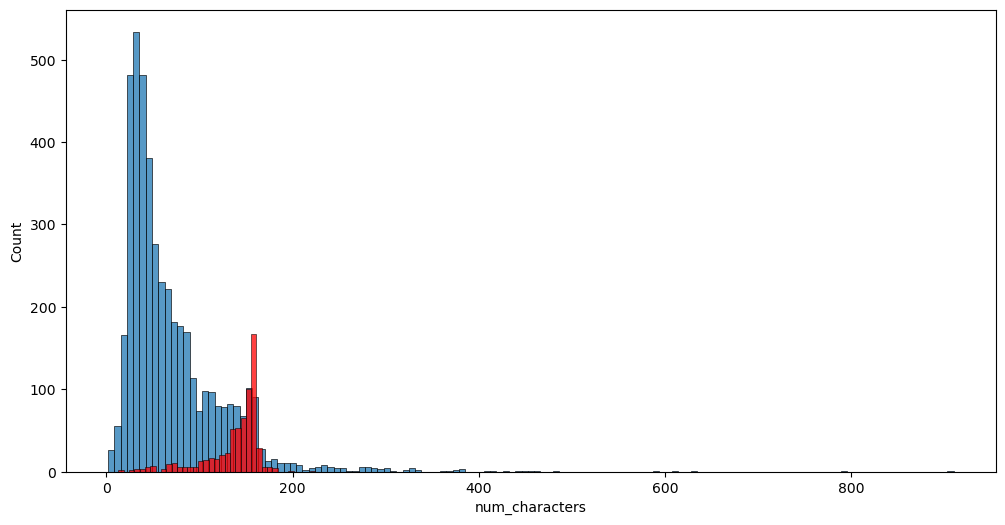

In [33]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_characters'])
sns.histplot(df[df['target']==1]['num_characters'],color='red')

<Axes: xlabel='num_words', ylabel='Count'>

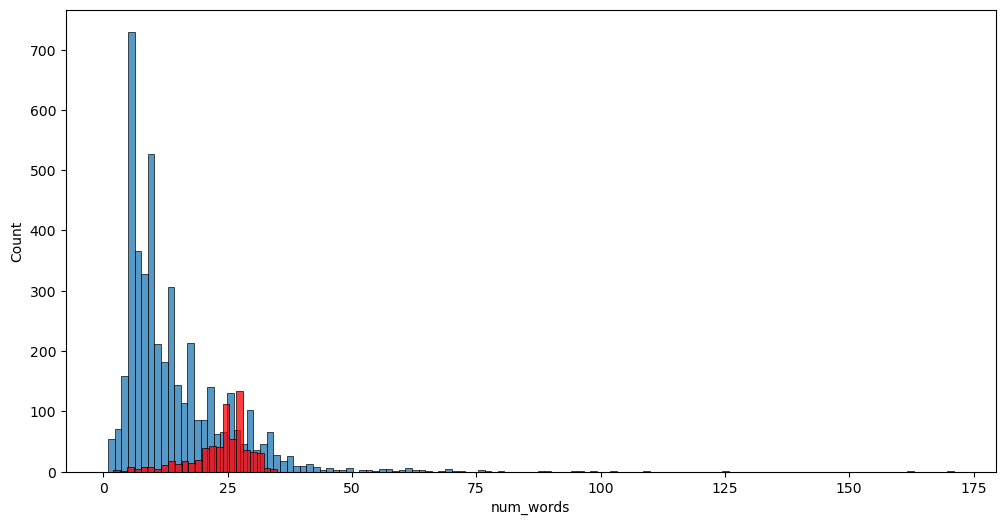

In [34]:
plt.figure(figsize=(12,6))
sns.histplot(df[df['target']==0]['num_words'])
sns.histplot(df[df['target']==1]['num_words'],color='red')

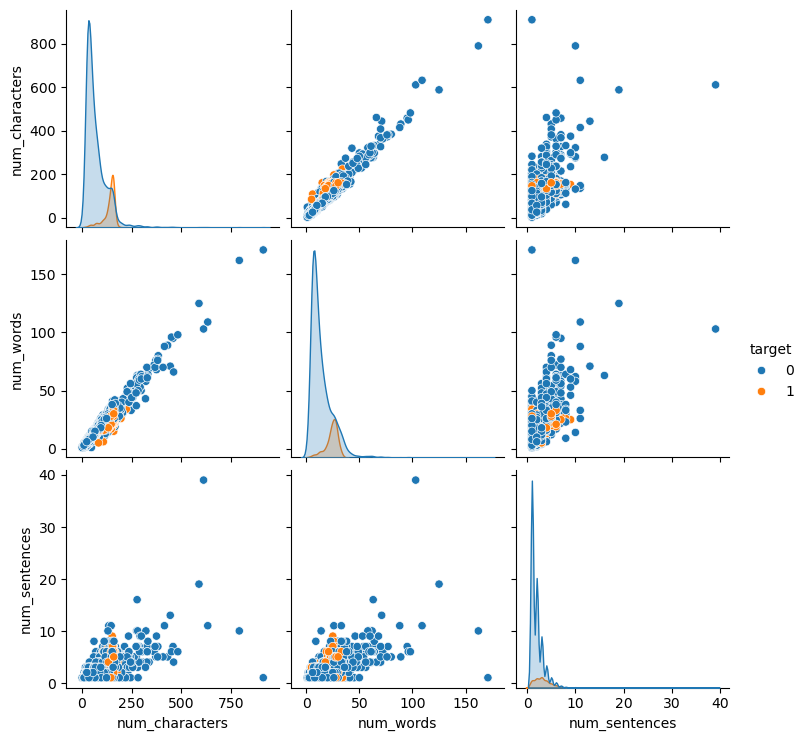

In [35]:
sns.pairplot(df,hue='target')

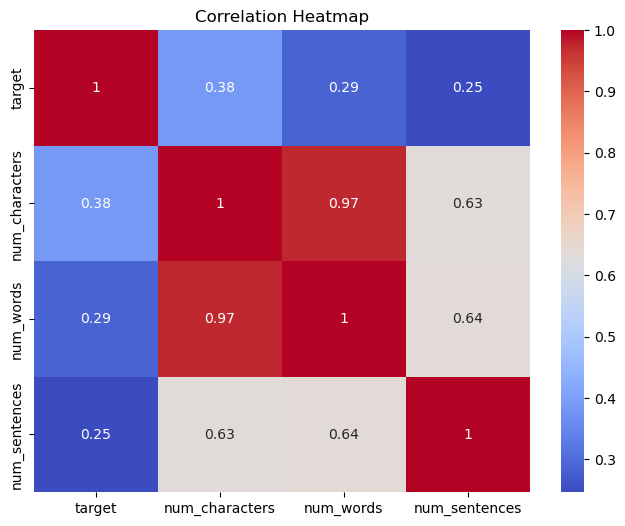

In [36]:
numeric_df = df.select_dtypes(include='number')
# Plot heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(numeric_df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()


## Data preprocessing

In [37]:
import re  #regular expression
import string
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS

def simple_stemmer(word):           #stemming means treat words like dance ,dancing,danced as same as dance only
    suffixes = ['ing', 'ly', 'ed', 'ious', 'ies', 'ive', 'es', 's', 'ment']
    for suffix in suffixes:
        if word.endswith(suffix) and len(word) > len(suffix) + 1:
            return word[:-len(suffix)]
    return word

def transform_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    text = re.sub(r'[^a-z0-9\s]', '', text)
    words = text.split()
    words = [word for word in words if word not in ENGLISH_STOP_WORDS]
    words = [simple_stemmer(word) for word in words]
    return " ".join(words)  # <-- return as string


In [38]:
transform_text('Hi,% how are u?')

'hi u'

In [39]:
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
# Or convert to list and display nicely
print(list(ENGLISH_STOP_WORDS))

['without', 'there', 'sincere', 'get', 'an', 'eg', 'hers', 'next', 'whereby', 'toward', 'con', 'therein', 'un', 'were', 'ours', 'under', 'of', 'both', 'so', 'behind', 'everyone', 'neither', 'been', 'some', 'due', 'than', 'three', 'until', 'off', 'amount', 'forty', 'these', 'anything', 'down', 'besides', 'such', 'go', 'they', 'thin', 'not', 'then', 'sometime', 'either', 'within', 'no', 'above', 'mine', 'nor', 'thru', 'this', 'own', 'other', 'whoever', 'further', 'those', 'eight', 'below', 'keep', 'she', 'here', 'nothing', 'whatever', 'a', 'whereas', 'much', 'against', 'side', 'someone', 'on', 'yourselves', 'cry', 'cant', 'together', 'how', 'often', 'ten', 'least', 'somehow', 'detail', 'inc', 'alone', 'many', 'by', 'otherwise', 'per', 'thick', 'too', 'several', 'front', 'full', 'therefore', 'never', 'name', 'onto', 'top', 'hasnt', 'though', 'only', 'will', 'towards', 'beside', 'your', 'de', 'where', 'you', 'anyhow', 'whose', 'had', 'moreover', 'us', 'whether', 'thereafter', 'cannot', 'wh

In [40]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [41]:
df['transform']=df['text'].apply(transform_text)

In [42]:
df.head()

,target,text,num_characters,word_tokens,num_words,num_sentences,transform
0,0,"Go until jurong point, crazy.. Available only ...",111,"[Go, until, jurong, point,, crazy.., Available...",20,3,jurong point crazy available bugi n great worl...
1,0,Ok lar... Joking wif u oni...,29,"[Ok, lar..., Joking, wif, u, oni...]",6,2,ok lar jok wif u oni
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,"[Free, entry, in, 2, a, wkly, comp, to, win, F...",28,2,free entry 2 wk comp win fa cup final tkt 21st...
3,0,U dun say so early hor... U c already then say...,49,"[U, dun, say, so, early, hor..., U, c, already...",11,2,u dun say ear hor u c say
4,0,"Nah I don't think he goes to usf, he lives aro...",61,"[Nah, I, don't, think, he, goes, to, usf,, he,...",13,1,nah dont think go usf liv


In [43]:
#Word cloud ek visual tool hai jo batata hai ki kisi text data me kaunse shabd kitni baar aaye hain. 
#Jitna zyada word repeat hota hai, utna bada wo dikhai deta hai. Isse hume quickly samajh aata hai ki data me kya important ya common hai.

In [44]:
!pip install wordcloud

Defaulting to user installation because normal site-packages is not writeable


In [45]:
from wordcloud import WordCloud
wc=WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [46]:
# Convert 'transform' column to string in case it's list of tokens
df['transform_str'] = df['transform'].apply(lambda x: ' '.join(x) if isinstance(x, list) else str(x))

# Drop any NaNs
df['transform_str'] = df['transform_str'].fillna("")

# Now generate word cloud text safely
text_spam = df[df['target'] == 1]['transform_str'].str.cat(sep=" ")

# Generate word cloud
spam_wc= wc.generate(text_spam)

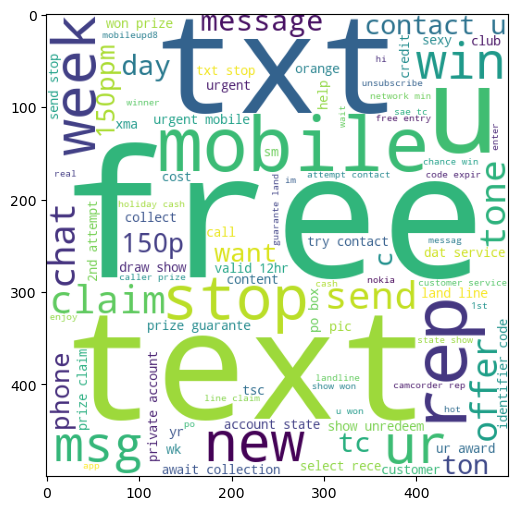

In [47]:
plt.figure(figsize=(15,6))
plt.imshow(spam_wc)

In [48]:
text_ham = df[df['target'] == 0]['transform_str'].str.cat(sep=" ")

# Generate word cloud
ham_wc= wc.generate(text_ham)

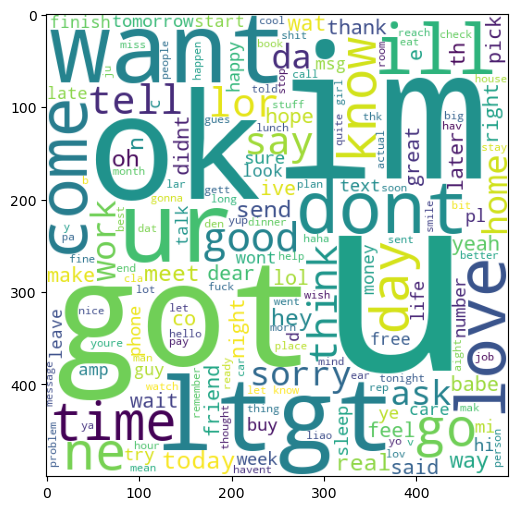

In [49]:
plt.figure(figsize=(15,6))
plt.imshow(ham_wc)

In [50]:
spam_corpus=[]
for msg in df[df['target']==1]['transform'].tolist():
    for word in msg.split():
        spam_corpus.append(word)

In [51]:
len(spam_corpus)

10109

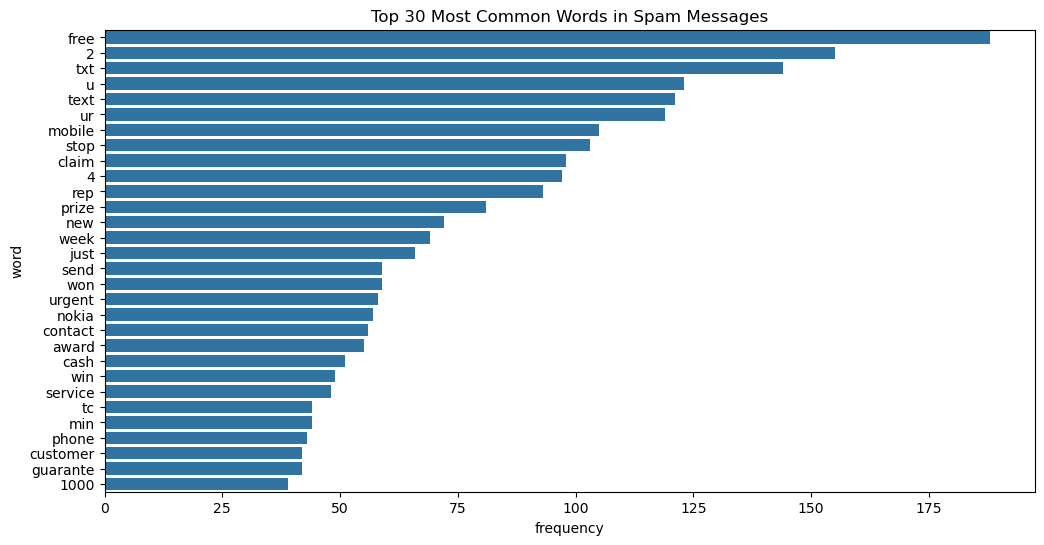

In [52]:
from collections import Counter
df_word_freq=pd.DataFrame(Counter(spam_corpus).most_common(30),columns=['word', 'frequency'])
plt.figure(figsize=(12, 6))
sns.barplot(x='frequency', y='word', data=df_word_freq)
plt.title('Top 30 Most Common Words in Spam Messages')
plt.show()

## Model Building

In [53]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv=CountVectorizer()
tfidf=TfidfVectorizer(max_features=3000)
X=tfidf.fit_transform(df['transform']).toarray()

In [54]:
#from sklearn.preprocessing import MinMaxScaler
#scaler = MinMaxScaler()
#X = scaler.fit_transform(X)

In [55]:
X.shape

(5169, 3000)

In [56]:
y=df['target'].values

In [57]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [58]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=2)

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB

In [60]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb=BernoulliNB()

In [61]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.8588007736943907
[[771 125]
 [ 21 117]]
0.4834710743801653


In [62]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9758220502901354
[[896   0]
 [ 25 113]]
1.0


In [63]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9825918762088974
[[895   1]
 [ 17 121]]
0.9918032786885246


In [64]:
#tfidf-->mnb
#baf of words--->bnb

In [65]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [66]:
svc = SVC(kernel='linear', gamma=1.0)
knc = KNeighborsClassifier()
mnb = MultinomialNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)


In [67]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': mnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'ETC': etc,
    'GBDT':gbdt,
}

In [68]:
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return accuracy,precision

In [69]:
train_classifier(svc, X_train[:500], y_train[:500], X_test[:100], y_test[:100])


(0.87, 1.0)

In [70]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
    current_accuracy,current_precision = train_classifier(clf, X_train[:500], y_train[:500], X_test[:100], y_test[:100])
    
    print("For ",name)
    print("Accuracy - ",current_accuracy)
    print("Precision - ",current_precision)
    
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

For  SVC
Accuracy -  0.87
Precision -  1.0


C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
[WinError 2] The system cannot find the file specified
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\ProgramData\anaconda3\Lib\site-packages\joblib\externals\loky\backend\context.py", line 257, in _count_physical_cores
    cpu_info = subprocess.run(
               ^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 548, in run
    with Popen(*popenargs, **kwargs) as process:
         ^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1026, in __init__
    self._execute_child(args, executable, preexec_fn, close_fds,
  File "C:\ProgramData\anaconda3\Lib\subprocess.py", line 1538, in _execute_child
    hp, ht, pid, tid = _winapi.CreatePro

For  KN
Accuracy -  0.81
Precision -  0.0
For  NB
Accuracy -  0.81
Precision -  0.0
For  DT
Accuracy -  0.88
Precision -  0.8888888888888888
For  LR
Accuracy -  0.84
Precision -  1.0
For  RF
Accuracy -  0.86
Precision -  1.0


C:\ProgramData\anaconda3\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:527: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For  AdaBoost
Accuracy -  0.88
Precision -  0.7333333333333333
For  BgC
Accuracy -  0.87
Precision -  0.8
For  ETC
Accuracy -  0.88
Precision -  1.0
For  GBDT
Accuracy -  0.86
Precision -  0.7777777777777778


In [71]:
performance_df=pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [72]:
performance_df

,Algorithm,Accuracy,Precision
0,SVC,0.87,1.000000
4,LR,0.84,1.000000
5,RF,0.86,1.000000
8,ETC,0.88,1.000000
3,DT,0.88,0.888889
7,BgC,0.87,0.800000
9,GBDT,0.86,0.777778
6,AdaBoost,0.88,0.733333
1,KN,0.81,0.000000
2,NB,0.81,0.000000


In [73]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")

In [74]:
performance_df1

,Algorithm,variable,value
0,SVC,Accuracy,0.870000
1,LR,Accuracy,0.840000
2,RF,Accuracy,0.860000
3,ETC,Accuracy,0.880000
4,DT,Accuracy,0.880000
5,BgC,Accuracy,0.870000
6,GBDT,Accuracy,0.860000
7,AdaBoost,Accuracy,0.880000
8,KN,Accuracy,0.810000
9,NB,Accuracy,0.810000


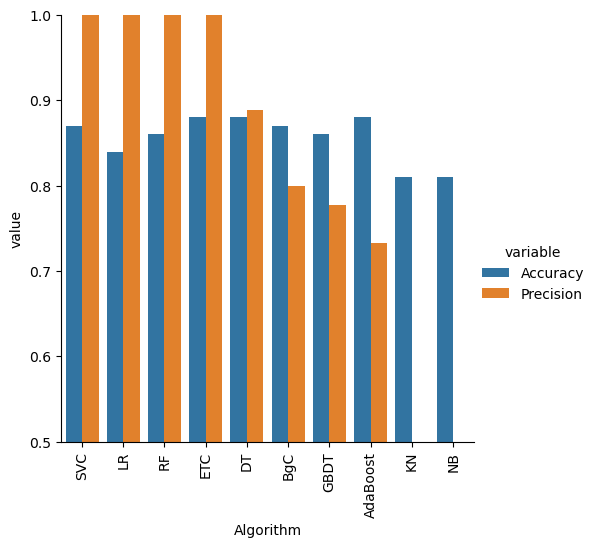

In [75]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

# model improve
# 1. Change the max_features parameter of TfIdf

In [76]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_max_ft_3000':accuracy_scores,'Precision_max_ft_3000':precision_scores}).sort_values('Precision_max_ft_3000',ascending=False)

In [77]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_scaling':accuracy_scores,'Precision_scaling':precision_scores}).sort_values('Precision_scaling',ascending=False)

In [78]:
new_df = performance_df.merge(temp_df,on='Algorithm')

In [79]:
new_df_scaled = new_df.merge(temp_df,on='Algorithm')

In [80]:
temp_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy_num_chars':accuracy_scores,'Precision_num_chars':precision_scores}).sort_values('Precision_num_chars',ascending=False)

In [81]:
new_df_scaled.merge(temp_df,on='Algorithm')

,Algorithm,Accuracy,Precision,Accuracy_scaling_x,Precision_scaling_x,Accuracy_scaling_y,Precision_scaling_y,Accuracy_num_chars,Precision_num_chars
0,SVC,0.87,1.000000,0.87,1.000000,0.87,1.000000,0.87,1.000000
1,LR,0.84,1.000000,0.84,1.000000,0.84,1.000000,0.84,1.000000
2,RF,0.86,1.000000,0.86,1.000000,0.86,1.000000,0.86,1.000000
3,ETC,0.88,1.000000,0.88,1.000000,0.88,1.000000,0.88,1.000000
4,DT,0.88,0.888889,0.88,0.888889,0.88,0.888889,0.88,0.888889
5,BgC,0.87,0.800000,0.87,0.800000,0.87,0.800000,0.87,0.800000
6,GBDT,0.86,0.777778,0.86,0.777778,0.86,0.777778,0.86,0.777778
7,AdaBoost,0.88,0.733333,0.88,0.733333,0.88,0.733333,0.88,0.733333
8,KN,0.81,0.000000,0.81,0.000000,0.81,0.000000,0.81,0.000000
9,NB,0.81,0.000000,0.81,0.000000,0.81,0.000000,0.81,0.000000


In [82]:
# Voting Classifier
#svc = SVC(kernel='sigmoid', gamma=1.0,probability=True)
#mnb = MultinomialNB()
#etc = ExtraTreesClassifier(n_estimators=50, random_state=2)

#from sklearn.ensemble import VotingClassifier

In [83]:
#voting = VotingClassifier(estimators=[('svm', svc), ('nb', mnb), ('et', etc)],voting='soft')

In [84]:
#voting.fit(X_train,y_train)

In [85]:
#y_pred = voting.predict(X_test)
#print("Accuracy",accuracy_score(y_test,y_pred))
#print("Precision",precision_score(y_test,y_pred))

In [86]:
# Applying stacking
#estimators=[('svm', svc), ('nb', mnb), ('et', etc)]
#final_estimator=RandomForestClassifier()

In [87]:
#from sklearn.ensemble import StackingClassifier

In [88]:
#clf = StackingClassifier(estimators=estimators, final_estimator=final_estimator)

In [89]:
from sklearn.naive_bayes import MultinomialNB
mnb= MultinomialNB()
mnb.fit(X_train, y_train)

MultinomialNB()

In [90]:
import pickle
pickle.dump(tfidf,open('vectorizer.pkl','wb'))
pickle.dump(mnb,open('model.pkl','wb'))